In [168]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

# Test cases for fragmentation with FragmentOnBonds

## Test case one

In the following example, the fragments are not sanitized appropriately.

In [205]:
smiles1 = 'C[C@H]1C[C@H]1C'

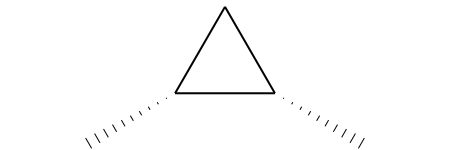

In [206]:
mol1 = Chem.MolFromSmiles(smiles1)
mol1

In [207]:
bonds1 = mol1.GetBonds()
len(bonds1)

5

In [208]:
b = 1

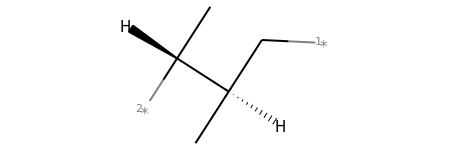

In [209]:
f_mol1 = Chem.FragmentOnBonds(mol1, (b,))
f_mol1

There is a carbon at to position 1 which is not saturated with hydrogen explicitly

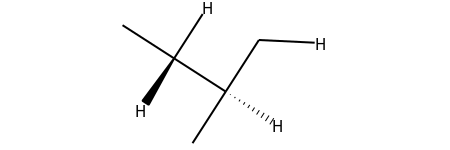

In [210]:
for atom in f_mol1.GetAtoms():
    if (atom.GetAtomicNum()==0):
        atom.SetAtomicNum(1)
        atom.SetIsotope(0)
f_mol1

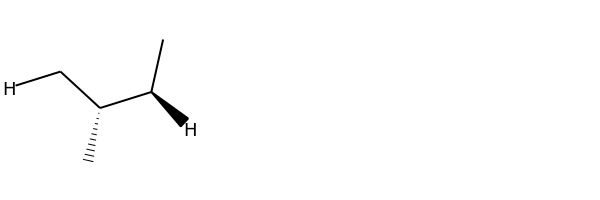

In [211]:
frags1 = Chem.GetMolFrags(f_mol1,asMols=True, sanitizeFrags=True)
MolsToGridImage(frags1)

This persists even after sanitizing the fragment (now the carbon atom is on the left of the molecule and has only one hydrogen atom attached)

## Test case two

In [212]:
smiles2 = 'N#CC1(C#N)[C@H]2C[C@@H]1N2'

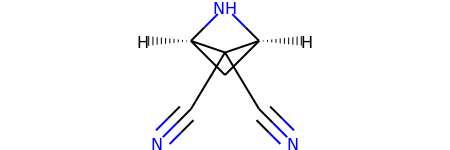

In [213]:
mol2 = Chem.MolFromSmiles(smiles2)
mol2

In [214]:
bonds2 = mol2.GetBonds()
len(bonds2)

10

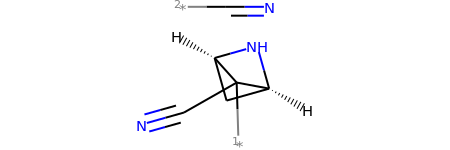

In [215]:
b = 1
f_mol2 = Chem.FragmentOnBonds(mol2, (b,))
f_mol2

The carbon in the smaller fragment is not saturated

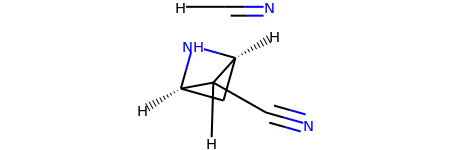

In [216]:
for atom in f_mol2.GetAtoms():
    if (atom.GetAtomicNum()==0):
        atom.SetAtomicNum(1)
        atom.SetIsotope(0)
f_mol2

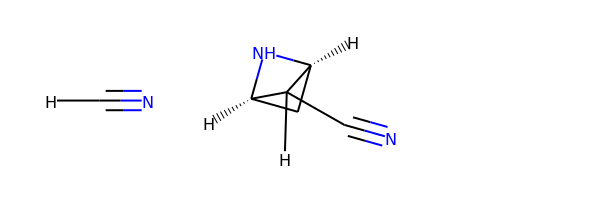

In [217]:
MolsToGridImage(Chem.GetMolFrags(f_mol2,asMols=True,sanitizeFrags=True))

Now they are sanitized correctly 